📊 Data loaded: 1,244 reviews across 3 banks
🚀 IDENTIFYING SATISFACTION DRIVERS

🏦 Analyzing Commercial Bank of Ethiopia...
   ✅ Analyzing 249 positive reviews
   ✅ Easy to Use: 10 mentions (4.0%)
   ✅ Fast Transactions: 5 mentions (2.0%)
   ✅ Reliable Service: 4 mentions (1.6%)
   ✅ Good Features: 6 mentions (2.4%)
   ✅ Secure: 5 mentions (2.0%)
   ✅ Good Customer Support: 3 mentions (1.2%)
   ✅ Modern Design: 3 mentions (1.2%)

🏦 Analyzing Bank of Abyssinia...
   ✅ Analyzing 176 positive reviews
   ✅ Easy to Use: 6 mentions (3.4%)
   ✅ Fast Transactions: 7 mentions (4.0%)
   ✅ Good Customer Support: 3 mentions (1.7%)

🏦 Analyzing Dashen Bank...
   ✅ Analyzing 255 positive reviews
   ✅ Easy to Use: 22 mentions (8.6%)
   ✅ Fast Transactions: 13 mentions (5.1%)
   ✅ Good Features: 3 mentions (1.2%)
   ✅ Secure: 14 mentions (5.5%)

📋 SUMMARY: Found 14 significant satisfaction drivers


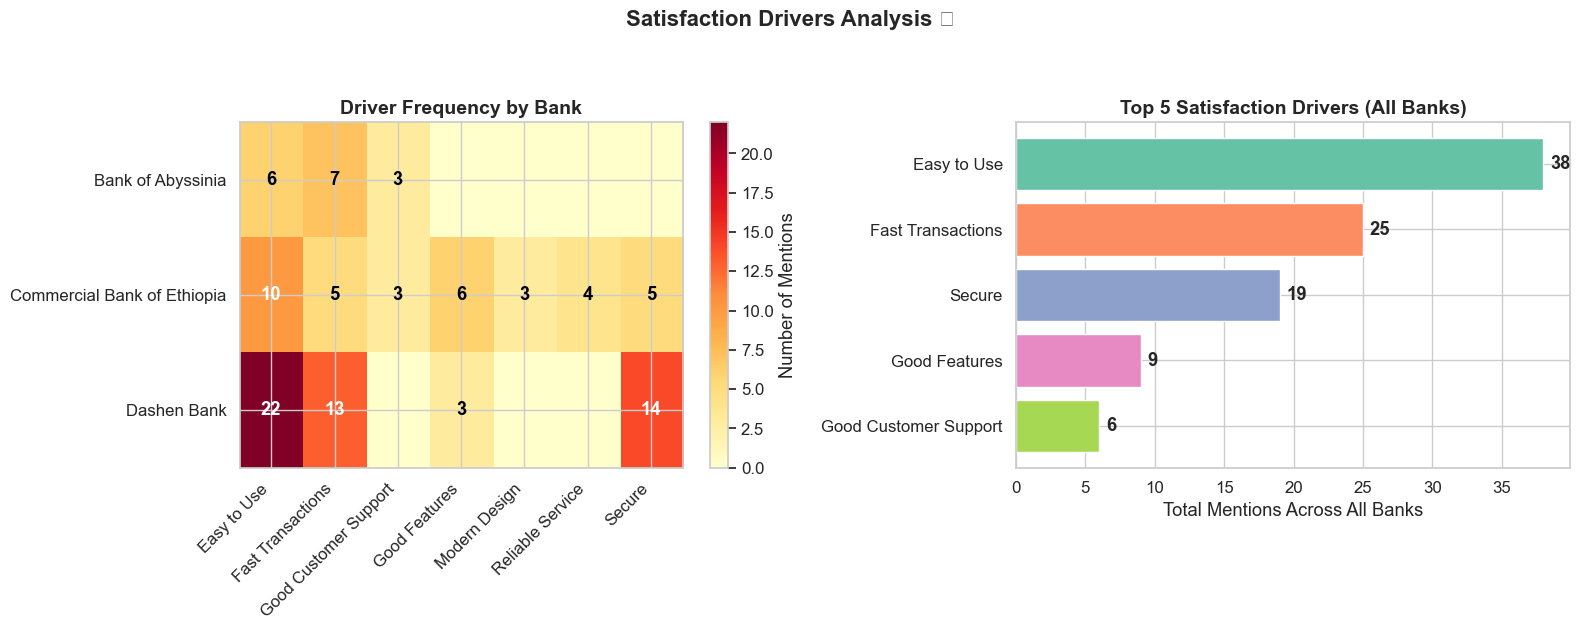

✅ Drivers visualization saved: data/processed/task4_drivers_analysis.png

⚠️ IDENTIFYING PAIN POINTS

🏦 Analyzing Commercial Bank of Ethiopia...
   ⚠️ Analyzing 62 negative reviews
   ⚠️ Login Issues: 6 complaints (9.7%) - MEDIUM severity
   ⚠️ App Crashes: 8 complaints (12.9%) - MEDIUM severity
   ⚠️ Slow Performance: 2 complaints (3.2%) - LOW severity
   ⚠️ Transaction Problems: 13 complaints (21.0%) - HIGH severity
   ⚠️ Network Issues: 3 complaints (4.8%) - LOW severity
   ⚠️ Feature Missing: 7 complaints (11.3%) - MEDIUM severity

🏦 Analyzing Bank of Abyssinia...
   ⚠️ Analyzing 148 negative reviews
   ⚠️ Login Issues: 6 complaints (4.1%) - MEDIUM severity
   ⚠️ App Crashes: 33 complaints (22.3%) - HIGH severity
   ⚠️ Slow Performance: 23 complaints (15.5%) - HIGH severity
   ⚠️ Transaction Problems: 11 complaints (7.4%) - HIGH severity
   ⚠️ Network Issues: 3 complaints (2.0%) - LOW severity
   ⚠️ Feature Missing: 21 complaints (14.2%) - HIGH severity
   ⚠️ Poor Support: 4 compla

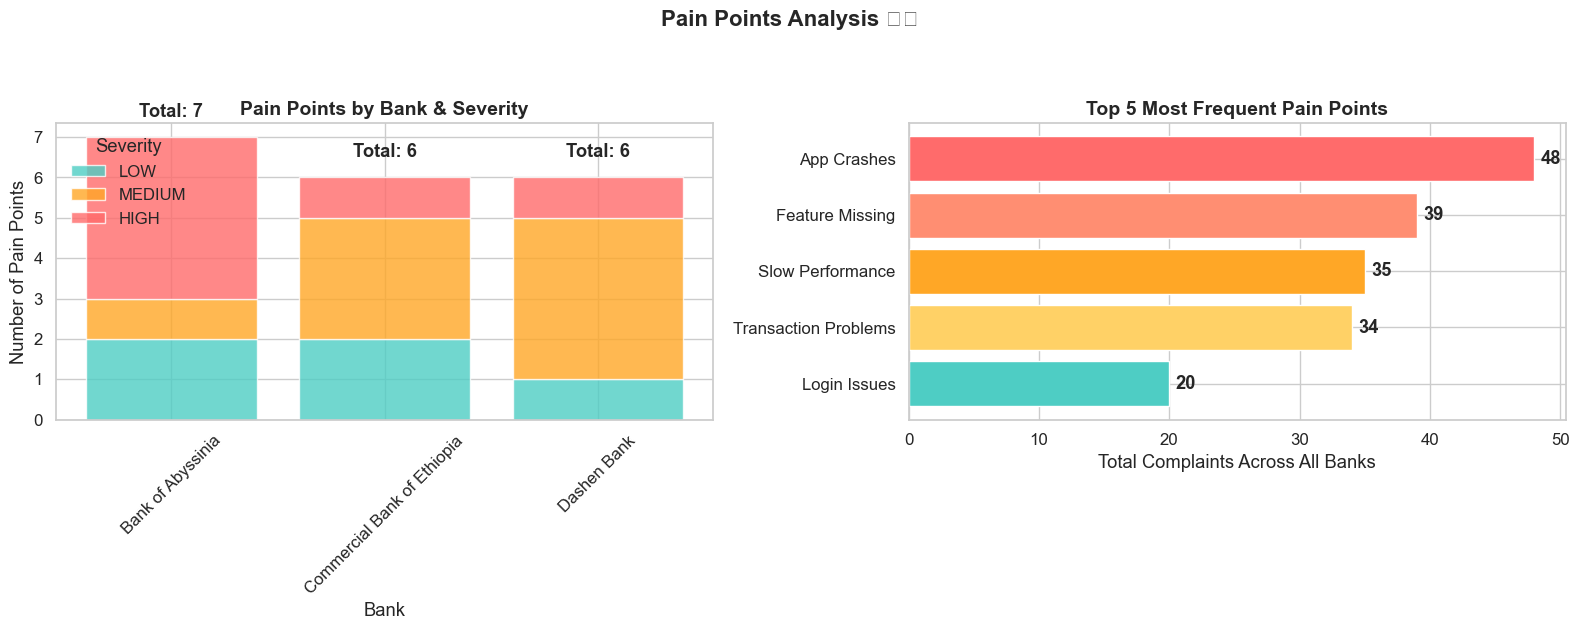

✅ Pain points visualization saved: data/processed/task4_painpoints_analysis.png
📋 EVIDENCE TABLES

📊 TABLE 1: SATISFACTION DRIVERS WITH EVIDENCE
--------------------------------------------------


,Bank,Driver,Mentions,Percentage,Avg Rating,Example 1
8,Bank of Abyssinia,Fast Transactions,7,4.0%,5.0/5,fast and simple
7,Bank of Abyssinia,Easy to Use,6,3.4%,5.0/5,fast and simple
9,Bank of Abyssinia,Good Customer Support,3,1.7%,4.7/5,This is help full i like ittttt
0,Commercial Bank of Ethiopia,Easy to Use,10,4.0%,5.0/5,make life easy
3,Commercial Bank of Ethiopia,Good Features,6,2.4%,5.0/5,Nice and very useful app i like it!
1,Commercial Bank of Ethiopia,Fast Transactions,5,2.0%,4.8/5,very good banking service and fast service
4,Commercial Bank of Ethiopia,Secure,5,2.0%,5.0/5,its easy to use and more secured than the previous one. i love it and appreciate...
2,Commercial Bank of Ethiopia,Reliable Service,4,1.6%,5.0/5,"Great application for me,So I would like to rate with Solid 5 star.That It works..."
5,Commercial Bank of Ethiopia,Good Customer Support,3,1.2%,5.0/5,thanks blc this app help me to use all time
6,Commercial Bank of Ethiopia,Modern Design,3,1.2%,5.0/5,"essy to use ,has great interface and user-friendly g"



📊 TABLE 2: PAIN POINTS WITH EVIDENCE
--------------------------------------------------


,Bank,Pain Point,Complaints,Percentage,Severity,Example 1
7,Bank of Abyssinia,App Crashes,33,22.3%,HIGH,most of the time is not working properly
8,Bank of Abyssinia,Slow Performance,23,15.5%,HIGH,not user friendly at all it requires a huge connectivity and also lags many time...
11,Bank of Abyssinia,Feature Missing,21,14.2%,HIGH,the lag is unbelievable when you need it the most this suks
9,Bank of Abyssinia,Transaction Problems,11,7.4%,HIGH,Why does it keep crashing? I can't even use this. BOA should do better. You have...
6,Bank of Abyssinia,Login Issues,6,4.1%,MEDIUM,1) Crashes repeatedly 2) Takes Century to Boot 3) Repeatedly requires Update whi...
12,Bank of Abyssinia,Poor Support,4,2.7%,LOW,I cant belive I could find the worst bank app ever .yet very simple to fix the p...
10,Bank of Abyssinia,Network Issues,3,2.0%,LOW,not user friendly at all it requires a huge connectivity and also lags many time...
3,Commercial Bank of Ethiopia,Transaction Problems,13,21.0%,HIGH,why we can't send money to other people telebirr wallets??
1,Commercial Bank of Ethiopia,App Crashes,8,12.9%,MEDIUM,this is absolute trash why because it's not Woking most time the servers are dow...
5,Commercial Bank of Ethiopia,Feature Missing,7,11.3%,MEDIUM,it suddenly asked me to enter the verification key I received. and it (*get your...


💡 KEY INSIGHTS SUMMARY

🚀 TOP SATISFACTION DRIVERS:
   • Commercial Bank of Ethiopia: Easy to Use (10 mentions)
   • Bank of Abyssinia: Fast Transactions (7 mentions)
   • Dashen Bank: Easy to Use (22 mentions)

⚠️ CRITICAL PAIN POINTS:
   • Commercial Bank of Ethiopia: Transaction Problems (13 complaints)
   • Bank of Abyssinia: App Crashes (33 complaints)
   • Bank of Abyssinia: Slow Performance (23 complaints)
   • Bank of Abyssinia: Transaction Problems (11 complaints)
   • Bank of Abyssinia: Feature Missing (21 complaints)
   • Dashen Bank: Feature Missing (11 complaints)

🎯 RECOMMENDATION PRIORITIES:
   • App Crashes: 48 total complaints across Commercial Bank of Ethiopia, Bank of Abyssinia, Dashen Bank
   • Feature Missing: 39 total complaints across Commercial Bank of Ethiopia, Bank of Abyssinia, Dashen Bank
   • Slow Performance: 35 total complaints across Commercial Bank of Ethiopia, Bank of Abyssinia, Dashen Bank

✅ Analysis complete! Found 14 drivers and 19 pain points.
   

In [1]:
# %% [markdown]
# # 🎯 Task 4.2: Satisfaction Drivers & Pain Points Analysis
# 
# ## Objective
# Identify what customers LOVE and HATE about each banking app, with quantitative evidence from review data.
# 
# ## Methodology
# 1. **Satisfaction Drivers**: Analyze 4-5 star positive reviews for recurring positive themes
# 2. **Pain Points**: Analyze 1-2 star negative reviews for recurring complaints
# 3. **Evidence-Based**: Count mentions and show example reviews for validation
# 
# ## Business Value
# - Understand competitive advantages to amplify
# - Identify critical issues to fix immediately
# - Prioritize development resources effectively

# %% [markdown]
# # 📥 1. Setup & Data Preparation

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Visualization setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
sns.set(style="whitegrid", font_scale=1.1)
%matplotlib inline

# Load data
df = pd.read_csv('../data/processed/reviews_with_themes.csv')
print(f"📊 Data loaded: {len(df):,} reviews across {df['bank'].nunique()} banks")

# %% [markdown]
# # 🚀 2. Satisfaction Drivers Analysis

# %%
print("🚀 IDENTIFYING SATISFACTION DRIVERS")
print("="*60)

# Initialize data collection
drivers_data = []

for bank in df['bank'].unique():
    print(f"\n🏦 Analyzing {bank}...")
    bank_data = df[df['bank'] == bank]
    
    # Get positive reviews (4-5 stars with positive sentiment)
    positive_reviews = bank_data[
        (bank_data['rating'] >= 4) & 
        (bank_data['sentiment_label'] == 'POSITIVE')
    ]
    
    if len(positive_reviews) == 0:
        print(f"   ⚠️ No positive reviews found")
        continue
    
    print(f"   ✅ Analyzing {len(positive_reviews)} positive reviews")
    
    # Define satisfaction drivers with specific keywords
    drivers_config = {
        'Easy to Use': ['easy', 'simple', 'user-friendly', 'intuitive', 'convenient', 'straightforward'],
        'Fast Transactions': ['fast', 'quick', 'speed', 'instant', 'fast transfer', 'immediate'],
        'Reliable Service': ['reliable', 'stable', 'works well', 'dependable', 'consistent', 'always works'],
        'Good Features': ['good feature', 'useful', 'helpful', 'great tool', 'excellent function', 'feature-rich'],
        'Secure': ['secure', 'safe', 'trust', 'protection', 'security', 'trustworthy'],
        'Good Customer Support': ['support', 'help', 'response', 'customer service', 'assistance'],
        'Modern Design': ['modern', 'design', 'interface', 'look', 'beautiful', 'aesthetic']
    }
    
    for driver_name, keywords in drivers_config.items():
        # Count mentions in positive reviews
        mention_mask = positive_reviews['review'].str.lower().str.contains('|'.join(keywords))
        mention_count = mention_mask.sum()
        
        if mention_count >= 3:  # Only report significant drivers
            # Calculate metrics
            percentage = (mention_count / len(positive_reviews)) * 100
            
            # Get example reviews
            example_reviews = positive_reviews[mention_mask]['review'].head(2).tolist()
            
            # Calculate average rating for this driver
            avg_rating = positive_reviews[mention_mask]['rating'].mean()
            
            drivers_data.append({
                'Bank': bank,
                'Driver': driver_name,
                'Mentions': mention_count,
                'Percentage': f"{percentage:.1f}%",
                'Avg Rating': f"{avg_rating:.1f}/5",
                'Example 1': example_reviews[0][:80] + "..." if len(example_reviews[0]) > 80 else example_reviews[0],
                'Example 2': example_reviews[1][:80] + "..." if len(example_reviews) > 1 else "N/A"
            })
            
            print(f"   ✅ {driver_name}: {mention_count} mentions ({percentage:.1f}%)")

# Create drivers DataFrame
drivers_df = pd.DataFrame(drivers_data)

print(f"\n📋 SUMMARY: Found {len(drivers_df)} significant satisfaction drivers")

# %% [markdown]
# # 📊 3. Satisfaction Drivers Visualization

# %%
if len(drivers_df) > 0:
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Satisfaction Drivers Analysis 🚀', fontsize=16, fontweight='bold', y=1.05)
    
    # Plot 1: Top drivers by bank (heatmap style)
    ax1.set_title('Driver Frequency by Bank', fontweight='bold', fontsize=14)
    
    # Create pivot table
    driver_pivot = drivers_df.pivot_table(
        index='Bank', 
        columns='Driver', 
        values='Mentions', 
        aggfunc='sum'
    ).fillna(0)
    
    # Create heatmap
    im = ax1.imshow(driver_pivot.values, cmap='YlOrRd', aspect='auto')
    
    # Set labels
    ax1.set_xticks(range(len(driver_pivot.columns)))
    ax1.set_xticklabels(driver_pivot.columns, rotation=45, ha='right')
    ax1.set_yticks(range(len(driver_pivot.index)))
    ax1.set_yticklabels(driver_pivot.index)
    
    # Add text annotations
    for i in range(len(driver_pivot.index)):
        for j in range(len(driver_pivot.columns)):
            value = driver_pivot.iloc[i, j]
            if value > 0:
                ax1.text(j, i, f'{int(value)}', 
                        ha='center', va='center', 
                        fontweight='bold', color='black' if value < 10 else 'white')
    
    plt.colorbar(im, ax=ax1, label='Number of Mentions')
    
    # Plot 2: Top 5 drivers overall
    ax2.set_title('Top 5 Satisfaction Drivers (All Banks)', fontweight='bold', fontsize=14)
    
    # Aggregate across all banks
    driver_totals = drivers_df.groupby('Driver')['Mentions'].sum().sort_values(ascending=False).head(5)
    
    bars = ax2.barh(range(len(driver_totals)), driver_totals.values, 
                   color=sns.color_palette('Set2', len(driver_totals)))
    ax2.set_yticks(range(len(driver_totals)))
    ax2.set_yticklabels(driver_totals.index)
    ax2.set_xlabel('Total Mentions Across All Banks')
    ax2.invert_yaxis()  # Highest on top
    
    # Add value labels
    for bar, value in zip(bars, driver_totals.values):
        ax2.text(value + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{int(value)}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../data/processed/task4_drivers_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Drivers visualization saved: data/processed/task4_drivers_analysis.png")
else:
    print("⚠️ No satisfaction drivers identified")

# %% [markdown]
# # ⚠️ 4. Pain Points Analysis

# %%
print("\n⚠️ IDENTIFYING PAIN POINTS")
print("="*60)

# Initialize data collection
pain_data = []

for bank in df['bank'].unique():
    print(f"\n🏦 Analyzing {bank}...")
    bank_data = df[df['bank'] == bank]
    
    # Get negative reviews (1-2 stars with negative sentiment)
    negative_reviews = bank_data[
        (bank_data['rating'] <= 2) & 
        (bank_data['sentiment_label'] == 'NEGATIVE')
    ]
    
    if len(negative_reviews) == 0:
        print(f"   ✅ No significant complaints found")
        continue
    
    print(f"   ⚠️ Analyzing {len(negative_reviews)} negative reviews")
    
    # Define pain points with specific keywords
    pain_config = {
        'Login Issues': ['login', 'password', 'authenticate', 'access', 'sign in', 'can\'t login', 'failed login'],
        'App Crashes': ['crash', 'freeze', 'not working', 'close', 'stop', 'error', 'bug', 'glitch'],
        'Slow Performance': ['slow', 'lag', 'wait', 'loading', 'delay', 'takes time', 'response time'],
        'Transaction Problems': ['transfer', 'transaction', 'send money', 'payment failed', 'not sent', 'pending'],
        'Network Issues': ['network', 'connection', 'internet', 'offline', 'connectivity', 'disconnect'],
        'Feature Missing': ['need', 'add', 'want', 'should have', 'missing', 'wish', 'hope', 'expect'],
        'Poor Support': ['support', 'help', 'response', 'customer service', 'assistance', 'no reply', 'ignore']
    }
    
    for pain_name, keywords in pain_config.items():
        # Count mentions in negative reviews
        mention_mask = negative_reviews['review'].str.lower().str.contains('|'.join(keywords))
        mention_count = mention_mask.sum()
        
        if mention_count >= 2:  # Report even minor pain points
            # Calculate metrics
            percentage = (mention_count / len(negative_reviews)) * 100
            
            # Get example complaints
            example_complaints = negative_reviews[mention_mask]['review'].head(2).tolist()
            
            # Calculate average sentiment for this pain point
            avg_sentiment = negative_reviews[mention_mask]['sentiment_score'].mean()
            
            # Determine severity
            severity = 'HIGH' if mention_count > 10 else 'MEDIUM' if mention_count > 5 else 'LOW'
            
            pain_data.append({
                'Bank': bank,
                'Pain Point': pain_name,
                'Complaints': mention_count,
                'Percentage': f"{percentage:.1f}%",
                'Avg Sentiment': f"{avg_sentiment:.3f}",
                'Severity': severity,
                'Example 1': example_complaints[0][:80] + "..." if len(example_complaints[0]) > 80 else example_complaints[0],
                'Example 2': example_complaints[1][:80] + "..." if len(example_complaints) > 1 else "N/A"
            })
            
            print(f"   ⚠️ {pain_name}: {mention_count} complaints ({percentage:.1f}%) - {severity} severity")

# Create pain points DataFrame
pain_df = pd.DataFrame(pain_data)

print(f"\n📋 SUMMARY: Found {len(pain_df)} significant pain points")

# %% [markdown]
# # 📊 5. Pain Points Visualization

# %%
if len(pain_df) > 0:
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Pain Points Analysis ⚠️', fontsize=16, fontweight='bold', y=1.05)
    
    # Plot 1: Pain points by bank and severity
    ax1.set_title('Pain Points by Bank & Severity', fontweight='bold', fontsize=14)
    
    # Create grouped data
    severity_data = pain_df.groupby(['Bank', 'Severity']).size().unstack().fillna(0)
    
    # Plot stacked bar chart
    colors = {'HIGH': '#FF6B6B', 'MEDIUM': '#FFA726', 'LOW': '#4ECDC4'}
    bottom = np.zeros(len(severity_data))
    
    for severity in ['LOW', 'MEDIUM', 'HIGH']:
        if severity in severity_data.columns:
            ax1.bar(severity_data.index, severity_data[severity], 
                   bottom=bottom, label=severity, color=colors[severity], alpha=0.8)
            bottom += severity_data[severity].values
    
    ax1.set_ylabel('Number of Pain Points')
    ax1.set_xlabel('Bank')
    ax1.legend(title='Severity')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add total counts
    for i, bank in enumerate(severity_data.index):
        total = severity_data.loc[bank].sum()
        ax1.text(i, total + 0.5, f'Total: {int(total)}', 
                ha='center', fontweight='bold')
    
    # Plot 2: Most frequent pain points
    ax2.set_title('Top 5 Most Frequent Pain Points', fontweight='bold', fontsize=14)
    
    pain_totals = pain_df.groupby('Pain Point')['Complaints'].sum().sort_values(ascending=False).head(5)
    
    bars = ax2.barh(range(len(pain_totals)), pain_totals.values,
                   color=['#FF6B6B', '#FF8E72', '#FFA726', '#FFD166', '#4ECDC4'])
    ax2.set_yticks(range(len(pain_totals)))
    ax2.set_yticklabels(pain_totals.index)
    ax2.set_xlabel('Total Complaints Across All Banks')
    ax2.invert_yaxis()
    
    # Add value labels
    for bar, value in zip(bars, pain_totals.values):
        ax2.text(value + 0.5, bar.get_y() + bar.get_height()/2,
                f'{int(value)}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../data/processed/task4_painpoints_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Pain points visualization saved: data/processed/task4_painpoints_analysis.png")
else:
    print("✅ No significant pain points identified")

# %% [markdown]
# # 📋 6. Evidence Tables

# %%
print("📋 EVIDENCE TABLES")
print("="*60)

if len(drivers_df) > 0:
    print("\n📊 TABLE 1: SATISFACTION DRIVERS WITH EVIDENCE")
    print("-" * 50)
    
    # Display concise drivers table
    drivers_display = drivers_df[['Bank', 'Driver', 'Mentions', 'Percentage', 'Avg Rating', 'Example 1']]
    drivers_display = drivers_display.sort_values(['Bank', 'Mentions'], ascending=[True, False])
    
    display(drivers_display.style
            .bar(subset=['Mentions'], color='#90EE90')
            .set_caption("Satisfaction Drivers with Quantitative Evidence"))

if len(pain_df) > 0:
    print("\n📊 TABLE 2: PAIN POINTS WITH EVIDENCE")
    print("-" * 50)
    
    # Display concise pain points table
    pain_display = pain_df[['Bank', 'Pain Point', 'Complaints', 'Percentage', 'Severity', 'Example 1']]
    pain_display = pain_display.sort_values(['Bank', 'Complaints'], ascending=[True, False])
    
    # Color code by severity
    def severity_color(val):
        if val == 'HIGH':
            return 'background-color: #FF6B6B; color: white'
        elif val == 'MEDIUM':
            return 'background-color: #FFA726'
        elif val == 'LOW':
            return 'background-color: #4ECDC4'
        return ''
    
    display(pain_display.style
            .applymap(severity_color, subset=['Severity'])
            .bar(subset=['Complaints'], color='#FF6B6B')
            .set_caption("Pain Points with Quantitative Evidence"))

# %% [markdown]
# # 💡 7. Key Insights Summary

# %%
print("💡 KEY INSIGHTS SUMMARY")
print("="*60)

# Generate insights from the analysis
if len(drivers_df) > 0:
    print("\n🚀 TOP SATISFACTION DRIVERS:")
    
    # Find top drivers for each bank
    for bank in df['bank'].unique():
        bank_drivers = drivers_df[drivers_df['Bank'] == bank]
        if len(bank_drivers) > 0:
            top_driver = bank_drivers.nlargest(1, 'Mentions').iloc[0]
            print(f"   • {bank}: {top_driver['Driver']} ({top_driver['Mentions']} mentions)")

if len(pain_df) > 0:
    print("\n⚠️ CRITICAL PAIN POINTS:")
    
    # Find high severity pain points
    high_pain = pain_df[pain_df['Severity'] == 'HIGH']
    if len(high_pain) > 0:
        for _, row in high_pain.iterrows():
            print(f"   • {row['Bank']}: {row['Pain Point']} ({row['Complaints']} complaints)")
    
    print("\n🎯 RECOMMENDATION PRIORITIES:")
    # Group by pain point across banks
    pain_summary = pain_df.groupby('Pain Point').agg({
        'Complaints': 'sum',
        'Bank': lambda x: ', '.join(x.unique())
    }).sort_values('Complaints', ascending=False)
    
    for pain_point, row in pain_summary.head(3).iterrows():
        print(f"   • {pain_point}: {row['Complaints']} total complaints across {row['Bank']}")

print(f"\n✅ Analysis complete! Found {len(drivers_df)} drivers and {len(pain_df)} pain points.")
print("   Next: Generate actionable recommendations based on these findings.")